# Exercise 2 : Implementing Backpropagation with Python

In [1]:
import numpy as np

In [2]:
class NeuralNetwork:
    def __init__(self, layers, alpha=0.1):

        self.W = []
        self.layers = layers
        self.alpha = alpha

        # start looping from the index of the first layer but
        # stop before we reach the last two layers
        for i in np.arange(0, len(layers) - 2):
            w = np.random.randn(layers[i] + 1, layers[i + 1] + 1)
            self.W.append(w / np.sqrt(layers[i]))

        w = np.random.randn(layers[-2] + 1, layers[-1])
        self.W.append(w / np.sqrt(layers[-2]))

    def __repr__(self):
        return "NeuralNetwork: {}".format(
            "-".join(str(l) for l in self.layers))

    def sigmoid(self, x):
        return 1.0 / (1 + np.exp(-x))

    def sigmoid_deriv(self, x):
        return x * (1 - x)

    def fit(self, X, y, epochs=1000, displayUpdate=100):
        X = np.c_[X, np.ones((X.shape[0]))]

        for epoch in np.arange(0, epochs):
            for (x, target) in zip(X, y):
                self.fit_partial(x, target)

            if epoch == 0 or (epoch + 1) % displayUpdate == 0:
                loss = self.calculate_loss(X, y)
                print("[INFO] epoch={}, loss={:.7f}".format(
                    epoch + 1, loss))

    def fit_partial(self, x, y):
        A = [np.atleast_2d(x)]

        # FEEDFORWARD:
        # loop over the layers in the network
        for layer in np.arange(0, len(self.W)):
            net = A[layer].dot(self.W[layer])

            out = self.sigmoid(net)

            A.append(out)

        # BACKPROPAGATION
        error = A[-1] - y

        D = [error * self.sigmoid_deriv(A[-1])]

        for layer in np.arange(len(A) - 2, 0, -1):
            delta = D[-1].dot(self.W[layer].T)
            delta = delta * self.sigmoid_deriv(A[layer])
            D.append(delta)

        D = D[::-1]

        # WEIGHT UPDATE PHASE
        # loop over the layers
        for layer in np.arange(0, len(self.W)):
            self.W[layer] += -self.alpha * A[layer].T.dot(D[layer])

    def predict(self, X, addBias=True):
        p = np.atleast_2d(X)

        # check to see if the bias column should be added
        if addBias:
            p = np.c_[p, np.ones((p.shape[0]))]

        # loop over our layers in the network
        for layer in np.arange(0, len(self.W)):
            p = self.sigmoid(np.dot(p, self.W[layer]))

        return p

    def calculate_loss(self, X, targets):
        targets = np.atleast_2d(targets)
        predictions = self.predict(X, addBias=False)
        loss = 0.5 * np.sum((predictions - targets) ** 2)

        return loss

### Neural Network XOR

In [3]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

In [4]:
nn = NeuralNetwork([2, 2, 1], alpha=0.5)
# [input, node개수, output]

In [5]:
print(nn)

NeuralNetwork: 2-2-1


In [6]:
nn.fit(X, y, epochs=20000, displayUpdate=2000)

[INFO] epoch=1, loss=0.5130552
[INFO] epoch=2000, loss=0.0033464
[INFO] epoch=4000, loss=0.0012955
[INFO] epoch=6000, loss=0.0007848
[INFO] epoch=8000, loss=0.0005581
[INFO] epoch=10000, loss=0.0004311
[INFO] epoch=12000, loss=0.0003504
[INFO] epoch=14000, loss=0.0002946
[INFO] epoch=16000, loss=0.0002538
[INFO] epoch=18000, loss=0.0002228
[INFO] epoch=20000, loss=0.0001984


In [7]:
for (x, target) in zip(X, y):
    pred = nn.predict(x)[0][0]
    step = 1 if pred > 0.5 else 0
    print("[INFO] data={}, ground-truth={}, pred={:.4f}, step={}".format(
                        x, target[0], pred, step))

[INFO] data=[0 0], ground-truth=0, pred=0.0077, step=0
[INFO] data=[0 1], ground-truth=1, pred=0.9898, step=1
[INFO] data=[1 0], ground-truth=1, pred=0.9898, step=1
[INFO] data=[1 1], ground-truth=0, pred=0.0114, step=0


### Neural Network MNIST

In [8]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import datasets

pixel intensity values to the range [0, 1]

each image is represented by an 8 x 8 = 64-dim feature vector

In [9]:
digits = datasets.load_digits()

In [10]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [11]:
import matplotlib.pyplot as plt

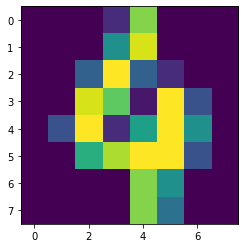

In [12]:
plt.imshow(digits.images[100])

In [13]:
digits.target[100]

4

construct the training and testing splits

In [14]:
data = digits.data.astype("float")
data = (data - data.min()) / (data.max() - data.min())
print("[INFO] samples: {}, dim: {}".format(data.shape[0], data.shape[1]))

[INFO] samples: 1797, dim: 64


In [17]:
(trainX, testX, trainY, testY) = train_test_split(data,
    digits.target, test_size=0.25, random_state=42)

In [18]:
trainY[0]

5

convert the labels from integers to vectors

In [19]:
trainY = LabelBinarizer().fit_transform(trainY)
testY = LabelBinarizer().fit_transform(testY)

In [23]:
trainY[:5]

array([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0]])

train the network

In [21]:
nn = NeuralNetwork([trainX.shape[1], 32, 16, 10])
print("[INFO] {}".format(nn))
nn.fit(trainX, trainY, epochs=1000)

[INFO] NeuralNetwork: 64-32-16-10
[INFO] epoch=1, loss=606.6218075
[INFO] epoch=100, loss=7.8881963
[INFO] epoch=200, loss=4.4575416
[INFO] epoch=300, loss=3.6716692
[INFO] epoch=400, loss=3.3656033
[INFO] epoch=500, loss=3.2611365
[INFO] epoch=600, loss=3.2027843
[INFO] epoch=700, loss=3.1652622
[INFO] epoch=800, loss=3.1390215
[INFO] epoch=900, loss=3.1195441
[INFO] epoch=1000, loss=3.1043162


evaluate the network

In [22]:
predictions = nn.predict(testX)
predictions = predictions.argmax(axis=1)
print(classification_report(testY.argmax(axis=1), predictions))

# precision : positive맞은거 / 맞은것들
# recall : positive맞은거 / positive라고예측한거
# f1-score : precision과 recall의 조화평균 (둘 다 좋아야 좋음)
# support : 450개중에 숫자(0~9)가 몇갠지

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      0.97      0.99        37
           2       0.95      1.00      0.97        38
           3       0.98      0.96      0.97        46
           4       1.00      1.00      1.00        55
           5       0.98      0.97      0.97        59
           6       0.98      1.00      0.99        45
           7       1.00      0.98      0.99        41
           8       0.95      0.97      0.96        38
           9       0.96      0.96      0.96        48

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



In [24]:
predictions = nn.predict(testX)

predictions[0].argmax()

6

In [25]:
predictions.shape

(450, 10)